<a href="https://colab.research.google.com/github/minerva79/prostate_segmentation/blob/main/interpolation_positive_lesion_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata


In [23]:
# Defining points with arbitrary but anatomically reflective coordinates
# Format: [X coordinate, Y coordinate, Positive Lesion Percentage]
data_points = np.array([
    [1, 3, 30],  # Left Anterior
    [3, 3, 60],  # Mid Anterior
    [5, 3, 20],  # Right Anterior
    [1, 1, 80],  # Left Posterior
    [3, 1, 50],  # Mid Posterior
    [5, 1, 70],  # Right Posterior
])


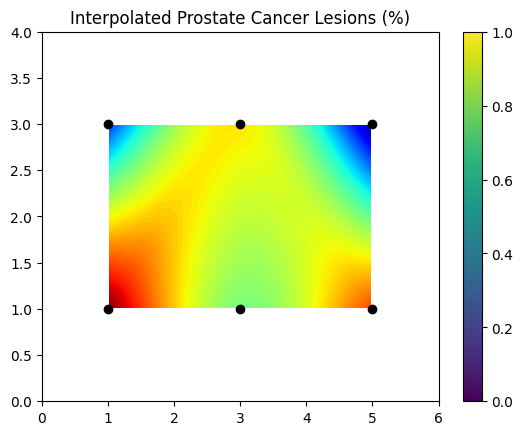

In [31]:
# Given data points
points = data_points[:, :2]  # Extracting X, Y coordinates
values = data_points[:, 2]   # Extracting Z values (percentages)

# Grid for interpolation
grid_x, grid_y = np.mgrid[0:6:100j, 0:4:100j]

# Perform interpolation
z1 = griddata(points, values, (grid_x, grid_y), method='cubic')

# Plotting
plt.figure()
plt.contourf(grid_x, grid_y, z1, levels=np.linspace(values.min(), values.max(), 100), cmap='jet')
plt.scatter(points[:, 0], points[:, 1], color='black')  # original data points
plt.colorbar()
plt.title('Interpolated Prostate Cancer Lesions (%)')
plt.show()
